# "Training ML models: Tips & Tricks" workshop at UB, SUNY

I am honored to be invited to present at the CSE workshops at UB. This webpage contains all the resources/material for my talk at UB.

## Quick intro to Machine Learning

My research experience has led me to appreciate the true essence of ML which encompasses mathematical concepts including statistics, probability, calculus, linear algebra, and optimization.

At its core, machine learning employs mathematical functions to model the relationships between inputs and outputs. These functions can range from simple linear equations to complex neural networks. The choice of function and how it is adjusted (or learned) during training depends on the algorithm being used and the specific problem being addressed.

### Diving deep into Machine Learning
Let's make our understanding concrete with a straight forward example.

Let's say you want to predict a dependent variable $y$ that is dependent on a single independent variable $x$. We assume that we don't have access to the mapping function $f(x) \rightarrow y$ and we are required to calculate/approximate the function $f(x)$. While the question might look simple at first, that simplicity is deceiving.

```{admonition} Approximating a function using Machine Learning
We are given a bunch of data points $(x,y)$ and we want to find the function $f$ that represents the mapping between $x$ and $y$ i.e., $f(x) = y$. (We are unaware if this mapping from $x$ to $y$ is linear or non-linear).
```

**How do we start?**

For simplicity, first let's assume that the relation between $x$ and $y$ is linear and then try to possibly extend our approach for non-linear mapping later. If the mapping between $x$ and $y$ is linear, then the equation for $f(x)$ looks like:

```{math}
:label: line-equation
y = mx + b
```

Take a closer look at equation {eq}`line-equation`, **what do we know in this equation and what do we need to approximate/calculate the function $f(x)$**. We know the data points $x$ and $y$ $(x, y)$ and we want to find the **optimal values** of $m$ and $b$ to correctly map a given $x$ to $y$.

Now this becomes an optimization problem, but what exactly are we optimizing? A more sensible question to ask here is that, **How do we know what are the optimal values for $m$ and $b$?** We need a metric that validates a set of values for $m$ and $b$.

Let's generate some synthetic data and visualize the data points to come up with this validation metric for the values of $m$ and $b$.


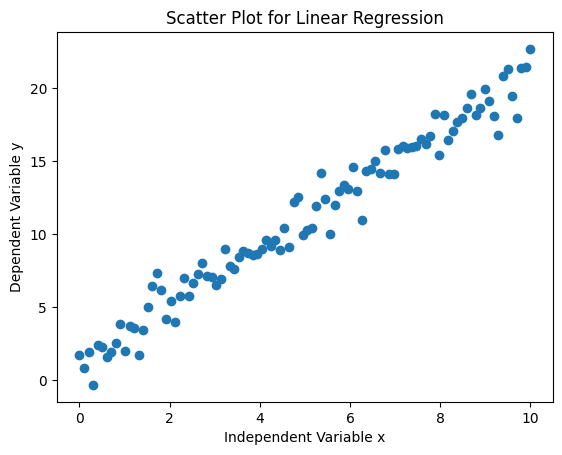

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for linear relation
x = np.linspace(0, 10, 100)  # Independent variable
y = 2*x + 1 + np.random.randn(100)  # Dependent variable with some noise

plt.scatter(x, y)  # Scatter plot of the points
plt.xlabel('Independent Variable x')
plt.ylabel('Dependent Variable y')
plt.title('Scatter Plot for Linear Regression')
plt.show()

The above plot is a good, simple example, we see a clear **linear** between $x$ and $y$ (keep in mind that we have simplified the relation between $x$ and $y$ before and have accordingly generated some synthetic data). We can visually infer that **the best fitting line is the one that passes through all (if not the most points) in the above scatter plot**. Using that notion, let's come up with a metric to validate $m$ and $b$.

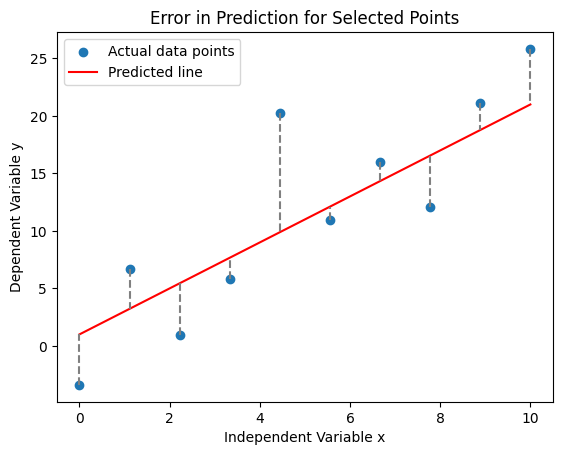

In [13]:
import matplotlib.pyplot as plt
import numpy as np

n_points = 10
# Generating a smaller dataset
x = np.linspace(0, 10, n_points)
y = 2*x + 1 + 5*np.random.randn(n_points)  # Actual data points with noise for fewer points

# Predicted line
y_pred = 2*x + 1 # m = 2 and b = 1

plt.scatter(x, y, label='Actual data points')
plt.plot(x, y_pred, color='red', label='Predicted line')

# Drawing error lines for these points
for xi, yi, ypi in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--')

plt.xlabel('Independent Variable x')
plt.ylabel('Dependent Variable y')
plt.title('Error in Prediction for Selected Points')
plt.legend()
plt.show()

### Defining the error in prediction and why do we need it?

Let's reiterate the need for the error term:
1. We want to find the mapping between $x$ and $y$ using a function $f(x) \rightarrow y$. This function $f(x)$ is now our prediction model that changes with the values of $m$ and $b$ (for the linear case), see {eq}`line-equation`.
2. We want to find the optimal values for $m$ and $b$ and hence find the right mapping $f(x)$.
3. For this we require an error term that tells us how right/wrong our predictions are.

Take a look at the above plot, the dashed lines drawn from the points onto the line represent the error in (linear) model's prediction. We want to incorporate these errors in prediction into the error function, let's call it $E(m, b)$ or $E(\hat{y})$, where $\hat{y}$ is the prediction $\hat{y} = mx+b$

**Naive approach to formulating the error term**

The first approach would be to sum up all the errors in prediction for each data point. The equation for such an error term would look like:

```{math}
:label: wrong-error
E(\hat{y}) = \sum_{i=1}^{N} (\hat{y}-y)
```

```{admonition} Issue with the above error function
:class: danger
However, the major issue with such an error function is the fact that the difference in prediction could be either positive or negative for a given point and if two data points are exactly on either side of the line, then the total error would be $0$ with is definitely wrong.
```

One way to solve this issue is using the modulus operation on the calculated difference. This would make all the errors positive and solve the above issue. The error function becomes:

```{math}
:label: wrong-error-2
E(\hat{y}) = \sum_{i=1}^{N} |(\hat{y}-y)|
```

This error function seems alright. There is no reason for us to discard this function at least right now (spoiler!!!)


### Finding the minimum value of the error function using math optimization

The way we formulated the error term, it's clear that we are interested in finding the minimum value of the function. There are many ways to achieve this:
1. Using the knowledge of high-school calculus, we know that a convex function $C(x)$ is minimum at a point $x_0$ at which its slope (derivative) $C'(x_0)= 0$.
2. A more general-purpose algorithm to **iteratively** find the local/global minima of a function is known as the [Gradient Descent Algorithm](https://www.math.uni-bielefeld.de/documenta/vol-ismp/40_lemarechal-claude.pdf) by Cauchy in **1847**. This algorithm is adapted to train (almost) every traditional Machine Learning model. (The term "Machine Learning" was coined **1959** over a century after the Gradient Descent algorithm was proposed).

### Gradient Descent

Gradient Descent is a **general-purpose** (not specific to machine learning) algorithm to find the global minima for a given convex function (and local minima for any non-convex function). A rudimentary definition of a convex function is a smooth function with single global minima without structural fluctuations.

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. For a given function $ c(x) $, where $ x $ represents the parameters of the function, gradient descent seeks to find the values of $ x $ that minimize $ c(x) $.

#### Mathematical Explanation

Let $ c(x) $ be the cost function that we want to minimize, where $ x = (x_1, x_2, \ldots, x_n) $ is a vector of parameters.

1. **Gradient**: The gradient of $ c $ at $ x $, denoted as $ \nabla c(x) $, is a vector containing the partial derivatives of $ c $ with respect to each parameter $ x_i $, i.e.,

```{math}
:label: gradient-descent
\nabla c(x) = \left( \frac{\partial c}{\partial x_1}, \frac{\partial c}{\partial x_2}, \ldots, \frac{\partial c}{\partial x_n} \right)
```

2. **Update Rule**: Starting with an initial guess for $ x $, the parameters are updated iteratively according to the rule

```{math}
:label: gradient-update
x_{\text{next}} = x - \alpha \nabla c(x)
```

where $ \alpha $ is the learning rate, a positive scalar determining the size of the step.

3. **Iteration**: This process is repeated until $ \nabla c(x) $ is close to zero or until the change in the cost function between iterations is below a predetermined threshold, indicating that a minimum has been reached.

#### Application in Machine Learning

In machine learning, gradient descent is used to optimize the loss function, which measures the difference between the predicted output of the model and the actual output. The parameters $ x $ represent the weights and biases of the model.

1. **Loss Function**: For a given dataset and a model, the loss function $ c(x) $ quantifies the error of the model predictions. Common examples include Mean Squared Error for regression tasks and Cross-Entropy Loss for classification tasks.

2. **Minimizing the Loss**: By applying gradient descent to the loss function, we iteratively adjust the model parameters to minimize the loss. This process improves the model's predictions over time.

3. **Backpropagation**: In the context of neural networks, gradient descent is used in conjunction with backpropagation, a method for efficiently computing the gradient of the loss function with respect to each weight by chain rule, allowing the model to learn from the data.

Gradient descent is a fundamental algorithm in machine learning for training models, enabling them to learn from data by minimizing the error between predicted and actual outputs. Its efficiency and simplicity make it suitable for a wide range of problems and model types.


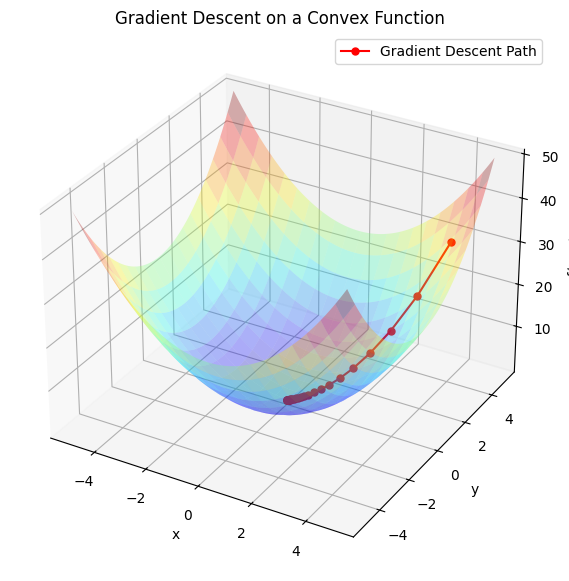

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the convex function
def f(x, y):
    return x**2 + y**2

# Generate x, y grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Gradient descent parameters
alpha = 0.1  # Learning rate
x_start, y_start = 4.0, 4.0  # Starting point

# Gradient descent function to update x, y
def grad(x, y):
    return 2*x, 2*y  # Derivative of f(x, y)

# Perform gradient descent
x_values, y_values, z_values = [x_start], [y_start], [f(x_start, y_start)]
for _ in range(30):
    dx, dy = grad(x_start, y_start)
    x_start, y_start = x_start - alpha * dx, y_start - alpha * dy
    x_values.append(x_start)
    y_values.append(y_start)
    z_values.append(f(x_start, y_start))

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.3, cmap='jet')
ax.plot(x_values, y_values, z_values, color='r', marker='o', markersize=5, label='Gradient Descent Path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent on a Convex Function')
ax.legend()
plt.show()


### Using Gradient Descent in Machine Learning

1. We have an error function $E$ {eq}`wrong-error-2`, which is parametrized by the values of $w$ and $b$, that we would like to minimize. 
2. Minimizing this error function will make our function $f(x)$ find the best fit.
3. We have a bunch of data points $(x, y)$ that we can use to iteratively find the minimum of the error function using the Gradient Descent algorithm.

```{admonition} Gradient Descent is not Machine Learning
Now you see how we utilized a mathematical optimization algorithm to solve a Machine Learning problem in mind. Many might have a misconception that gradient descent is a machine learning algorithm, but in reality, machine learning utilizes an existing optimization algorithm such as gradient descent.
```

### Does our current error function work with Gradient Descent?

Let's take another look at {eq}`wrong-error-2` and {eq}`gradient-update`

$$
E(\hat{y}) = \sum_{i=1}^{N} |(\hat{y}-y)|
$$

$$
x_{\text{next}} = x - \alpha \nabla c(x)
$$

We see from the gradient update equation that, to iteratively minimize the cost function $C(x)$ (which is the function $E$ in our case), we have to differentiate (partially with all the variables) the error/cost function. This means we have to ind the differentiation of modulus function present in our error function. <span style="color:red">However, we know that the derivative of modulus function is undefined at</span> $x=0$.


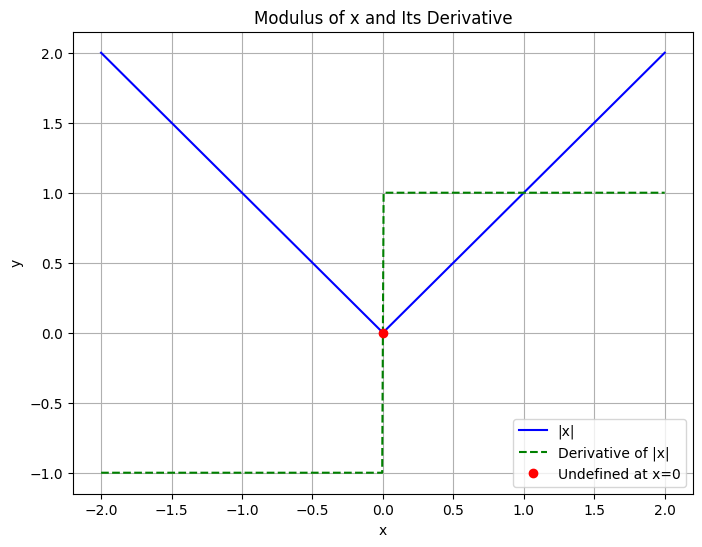

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the range for x including negative values
x = np.linspace(-2, 2, 400)
y = np.abs(x)  # Modulus of x

# Derivative of |x|, which is undefined at x = 0
# Using a piecewise function to represent the derivative
y_derivative = np.piecewise(x, [x < 0, x > 0], [-1, 1])

plt.figure(figsize=(8, 6))

# Plotting modulus of x
plt.plot(x, y, label='|x|', color='blue')

# Plotting derivative of |x|
plt.plot(x, y_derivative, label="Derivative of |x|", color='green', linestyle='--')

# Highlighting the point where the derivative is undefined
plt.plot(0, 0, 'ro', label='Undefined at x=0')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Modulus of x and Its Derivative')
plt.legend()
plt.grid(True)
plt.show()

**This means, in order to use the gradient descent algorithm, we need a differentiable cost function throughout the real-line and incorporates the characteristics of our previous error metrics** i.e., high values when the prediction is wrong, and smaller values when the predictions are right.

Here comes the **Mean Square Error Loss** which is the sum of squares of differences between predictions and true values (for continuous number prediction).

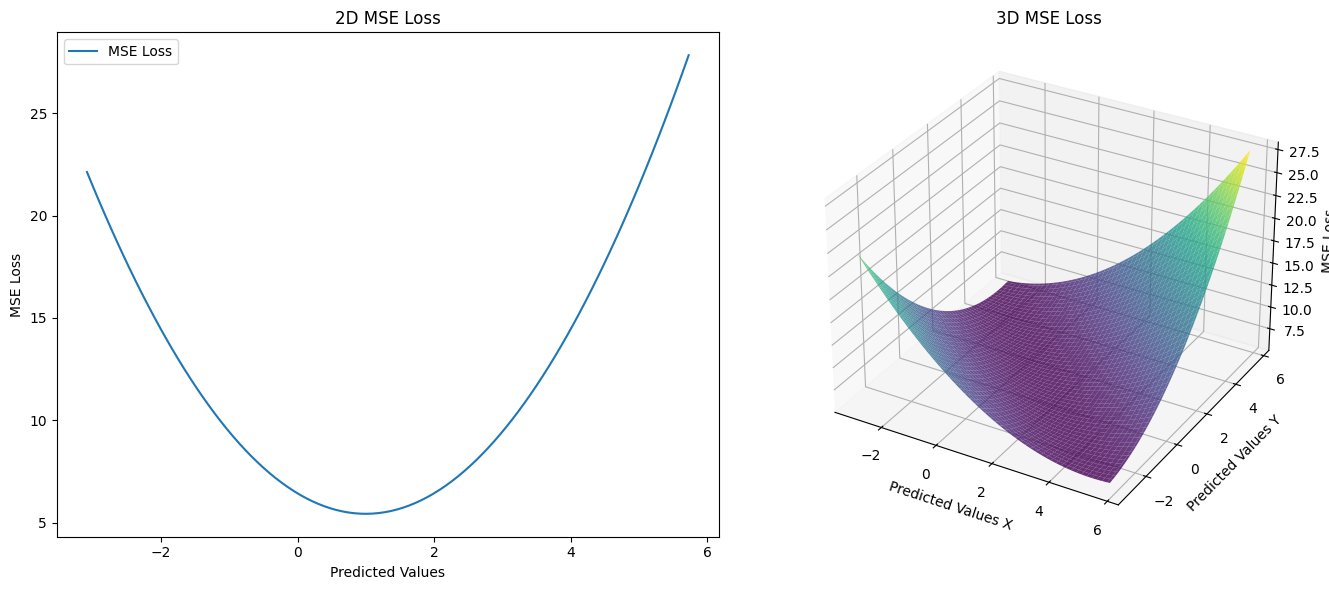

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Generating synthetic data for demonstration
np.random.seed(0)
x = np.linspace(-2, 2, 100)
y_actual = 2 * x + 1
y_pred = y_actual + np.random.normal(scale=0.5, size=x.shape)

# Mean Squared Error Loss function
def mse_loss(y_actual, y_pred):
    return ((y_actual - y_pred) ** 2).mean()

# Calculate MSE for a range of predictions
y_range = np.linspace(y_pred.min(), y_pred.max(), 100)
mse_values = [mse_loss(y_actual, yi) for yi in y_range]

# 2D Plot
plt.figure(figsize=(14, 6))

# 2D subplot
plt.subplot(1, 2, 1)
plt.plot(y_range, mse_values, label='MSE Loss')
plt.xlabel('Predicted Values')
plt.ylabel('MSE Loss')
plt.title('2D MSE Loss')
plt.legend()

# 3D subplot
ax = plt.subplot(1, 2, 2, projection='3d')
X, Y = np.meshgrid(y_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = mse_loss(y_actual, (X[i, j] + Y[i, j]) / 2)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('Predicted Values X')
ax.set_ylabel('Predicted Values Y')
ax.set_zlabel('MSE Loss')
ax.set_title('3D MSE Loss')

plt.tight_layout()
plt.show()

Now that we have the error function ready to suit the requirements of gradient descent, let's look for any additional variables introduced by Gradient Descent. A closer look at the above loss values suggests that Scikit-Learn uses Batch Gradient Descent by default. If we take a look at the equation {eq}`gradient-update`, we see that a new term $\alpha$ is introduced by Gradient Descent.

This is formally known as the **Learning rate** and this is a hyper-parameter.

```{admonition} What are Hyper-parameters?
:class: tip
Hyperparameters are the configuration settings used to structure the learning process in machine learning algorithms. Unlike model parameters, which the model learns during training, hyperparameters are set before training begins and guide the training process. Examples include the learning rate, number of iterations, and batch size in gradient descent, or the depth of a tree in decision trees.

Hyperparameters are tuned through various strategies to find the combination that yields the best model performance, typically measured by a validation metric. Common tuning methods include:

* **Grid Search**: Tests every combination of hyperparameters in a predefined set.
* **Random Search**: Randomly samples combinations of hyperparameters over a specified search space.
* **Bayesian Optimization**: Uses a probabilistic model to predict which hyperparameters might lead to better results and prioritizes testing those.
* **Gradient-based Optimization**: Adjusts hyperparameters in a direction that minimally increases the validation loss, applicable when hyperparameters are continuous.
The goal of hyperparameter tuning is to find the optimal settings that minimize the validation loss, thus improving the model's ability to generalize to unseen data.
```


## Training using Gradient Descent

Final loss value 2.9769204946318854e-10


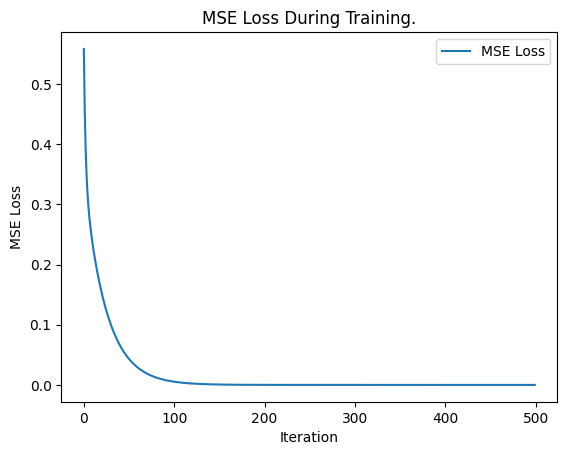

Optimal values for w and b are 2.0 1.0


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(-1, 1, 100)  # 100 data points
y = 2 * x + 1 # + np.random.normal(scale=0.5, size=x.shape)  # True function is y = 2x + 1 with noise

# Split data into train, validation, and test sets
train_size = int(0.6 * len(x))
val_size = int(0.2 * len(x))
test_size = len(x) - train_size - val_size

x_train, y_train = x[:train_size], y[:train_size]
x_val, y_val = x[train_size:train_size+val_size], y[train_size:train_size+val_size]
x_test, y_test = x[train_size+val_size:], y[train_size+val_size:]

# Gradient Descent parameters
learning_rate = 0.1
iterations = 500
w, b = np.random.randn(), np.random.randn()  # Initial parameters

# Mean Squared Error Loss function
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Gradient Descent function
def gradient_descent(x, y, w, b, learning_rate, iterations):
    n = len(x)
    mse_history = []

    for i in range(iterations):
        # Prediction
        y_pred = w * x + b
        
        # Calculate gradients
        dw = -(2/n) * sum(x * (y - y_pred))
        db = -(2/n) * sum(y - y_pred)
        
        # Update weights
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Calculate loss
        loss = mse(y, y_pred)
        mse_history.append(loss)
        
        # print(f"Iteration {i+1}: MSE = {loss}")

    return w, b, mse_history

# Train the model
w, b, mse_history = gradient_descent(x_train, y_train, w, b, learning_rate, iterations)

print("Final loss value", mse_history[-1])
# Plotting MSE history
plt.plot(mse_history, label='MSE Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('MSE Loss During Training.')
plt.legend()
plt.show()
print("Optimal values for w and b are", round(w, 2), round(b, 2))


### Tips and Tricks to training traditional ML models

In [31]:
import numpy as np
import time

# Common setup
x = np.linspace(-1, 1, 1000)
y = 2 * x + 1 + np.random.normal(scale=0.5, size=x.shape)
learning_rate = 0.01
iterations = 10000

# Mean Squared Error Loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Batch Gradient Descent function
def batch_gradient_descent(x, y, learning_rate, iterations):
    start_time = time.time()
    w, b = np.random.randn(), np.random.randn()
    losses = []
    n = len(x)
    for i in range(iterations):
        y_pred = w * x + b
        losses.append(mse_loss(y, y_pred))
        dw = -(2/n) * np.dot(x, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b, losses[-1], time.time() - start_time

# Stochastic Gradient Descent function
def stochastic_gradient_descent(x, y, learning_rate, iterations):
    start_time = time.time()
    w, b = np.random.randn(), np.random.randn()
    losses = []
    n = len(x)
    for i in range(iterations):
        idx = np.random.randint(n)
        x_i, y_i = x[idx], y[idx]
        y_pred = w * x_i + b
        losses.append(mse_loss(np.array([y_i]), np.array([y_pred])))
        dw = -2 * x_i * (y_i - y_pred)
        db = -2 * (y_i - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b, losses[-1], time.time() - start_time

# Mini-batch Gradient Descent function
def mini_batch_gradient_descent(x, y, learning_rate, iterations, batch_size=20):
    start_time = time.time()
    w, b = np.random.randn(), np.random.randn()
    losses = []
    n = len(x)
    for i in range(iterations):
        idx = np.random.choice(np.arange(n), batch_size, replace=False)
        x_i, y_i = x[idx], y[idx]
        y_pred = w * x_i + b
        losses.append(mse_loss(y_i, y_pred))
        dw = -(2/batch_size) * np.dot(x_i, (y_i - y_pred))
        db = -(2/batch_size) * np.sum(y_i - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b, losses[-1], time.time() - start_time

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Run each gradient descent type
bgd_w, bgd_b, bgd_loss, bgd_time = batch_gradient_descent(x, y, learning_rate, iterations)
sgd_w, sgd_b, sgd_loss, sgd_time = stochastic_gradient_descent(x, y, learning_rate, iterations)
mbgd_w, mbgd_b, mbgd_loss, mbgd_time = mini_batch_gradient_descent(x, y, learning_rate, iterations, batch_size=20)

print(f"Batch Gradient Descent Time: {bgd_time} seconds, Final Loss: {bgd_loss}")
print(f"Stochastic Gradient Descent Time: {sgd_time} seconds, Final Loss: {sgd_loss}")
print(f"Mini-Batch Gradient Descent Time: {mbgd_time} seconds, Final Loss: {mbgd_loss}")
print("-----------------------------------------------------")
print("Let's test with Scikit-Learn's implementation")

# Fit the model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Predict using the model
y_pred_sklearn = model.predict(x.reshape(-1, 1))

# Calculate MSE for Scikit-learn's implementation
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"Scikit-learn LinearRegression MSE: {mse_sklearn}")

Batch Gradient Descent Time: 0.18442487716674805 seconds, Final Loss: 0.24044086764058123
Stochastic Gradient Descent Time: 0.09557771682739258 seconds, Final Loss: 0.024073576338893586
Mini-Batch Gradient Descent Time: 0.4299464225769043 seconds, Final Loss: 0.2989110091910686
-----------------------------------------------------
Let's test with Scikit-Learn's implementation
Scikit-learn LinearRegression MSE: 0.2404408676405812



#### Tuning Hyperparameters

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generate synthetic data
x = np.linspace(-1, 1, 100)
y = 2 * x + 1 + np.random.normal(scale=0.5, size=x.shape)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Batch Gradient Descent function
def batch_gradient_descent(x, y, learning_rate, iterations):
    w, b = np.random.randn(), np.random.randn()
    n = len(x)
    for _ in range(iterations):
        y_pred = w * x + b
        dw = -(2/n) * np.dot(x, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

# Mean Squared Error Loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1, 0.5]
iterations = [50, 100, 200]
best_loss = float('inf')
best_lr = 0
best_iter = 0

for lr in learning_rates:
    for iter in iterations:
        w, b = batch_gradient_descent(x_train, y_train, lr, iter)
        y_pred = w * x_test + b
        loss = mse_loss(y_test, y_pred)
        if loss < best_loss:
            best_loss = loss
            best_lr = lr
            best_iter = iter

print(f"Best Learning Rate: {best_lr}, Best Iterations: {best_iter}, Best Loss: {best_loss}")

Best Learning Rate: 0.5, Best Iterations: 100, Best Loss: 0.3717253690652533


#### Feature Engineering

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. These features can be used to improve the performance of machine learning algorithms. Feature engineering aims to create meaningful features that capture underlying patterns in the data, thereby enhancing model accuracy and performance.

Demonstrating the Importance of Feature Engineering
Let's use a synthetic dataset to illustrate how introducing higher-order features can improve the performance of a logistic regression model. We'll create a dataset where the relationship between the input features and the output label is not linearly separable, necessitating the use of higher-order polynomial features for effective classification.

This is visually explained by TensorFlow in their [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.90025&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

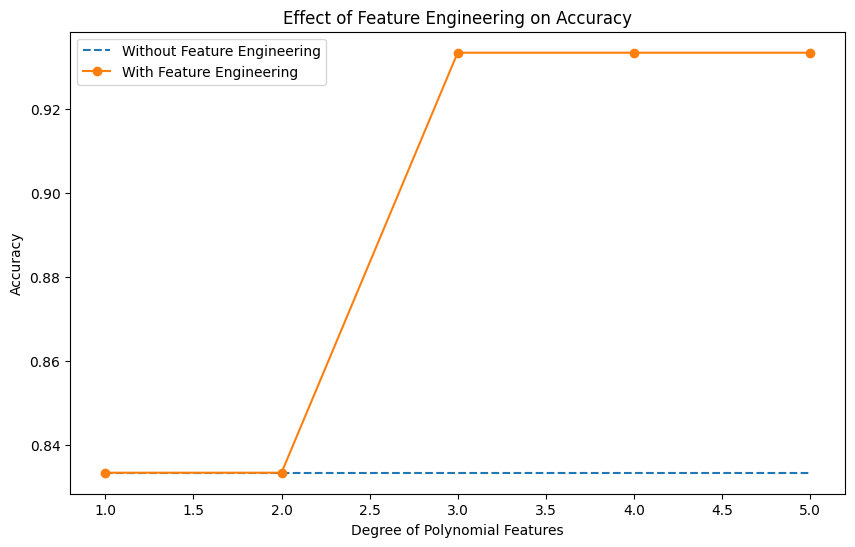

Accuracy without feature engineering: 0.8333333333333334
Accuracy with feature engineering: 0.9333333333333333


In [35]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression without feature engineering
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_without_fe = accuracy_score(y_test, predictions)

# Logistic Regression with Polynomial Features
degrees = [1, 2, 3, 4, 5]
accuracies = []

for degree in degrees:
    pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("logistic_regression", LogisticRegression())
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.plot(degrees, [accuracy_without_fe]*len(degrees), label='Without Feature Engineering', linestyle='--')
plt.plot(degrees, accuracies, label='With Feature Engineering', marker='o')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Accuracy')
plt.title('Effect of Feature Engineering on Accuracy')
plt.legend()
plt.show()

print(f"Accuracy without feature engineering: {accuracy_without_fe}")
print("Accuracy with feature engineering:", accuracies[-1])


#### Implementing Callbacks

Callbacks in machine learning are functions that are executed at certain stages of the training process, such as at the start or end of an epoch, before or after a batch, or at the end of the training. They provide a way to automate certain tasks during the training process, such as saving models, adjusting learning rates, early stopping if the model isn't improving, or logging metrics.

Implementing a Simple Callback
Below is an example of implementing a simple callback system from scratch, including a callback for displaying training progress and performing early stopping if the validation loss stops improving.


```python
# This is a pseudo-code for a simple Callbacks function
class Callback:
    def on_train_begin(self, logs=None):
        pass

    def on_epoch_end(self, epoch, logs=None):
        pass

class PrintProgressCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch: {epoch}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

class EarlyStoppingCallback(Callback):
    def __init__(self, patience=2):
        self.patience = patience
        self.best_loss = float('inf')
        self.wait = 0
    
    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs['val_loss']
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f"Stopping early at epoch {epoch}")
                self.model.stop_training = True

# Dummy training function with callbacks
def train(model, x, y, epochs, callbacks=[]):
    for epoch in range(epochs):
        # Dummy loss calculations
        loss = 1 / (epoch + 1)
        val_loss = 1 / (epoch + 1) + 0.1
        
        # Simulate early stopping mechanism
        if hasattr(model, 'stop_training') and model.stop_training:
            break
        
        logs = {'loss': loss, 'val_loss': val_loss}
        for callback in callbacks:
            callback.on_epoch_end(epoch, logs)

# Dummy model object
class Model:
    stop_training = False

model = Model()
callbacks = [PrintProgressCallback(), EarlyStoppingCallback(patience=3)]
train(model, None, None, 10, callbacks)
```

Take a look at PyTorch's Callbacks [documentation](https://pytorch.org/tnt/stable/framework/callbacks.html) for more info.


## Machine Learning v/s Deep Learning

![](https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/file-uploads/blogs/22606/images/e63c7ab-276c-cfb2-3f2a-80446bedb8b_electronics-09-00483-g001.webp)

### Issues with Very Large Deep Learning Models
* Memory Constraints: Large models require significant memory, which can exceed the capacity of a single GPU or even a single machine.
* Computation Time: Training large models is computationally intensive, leading to longer training times.
* Overfitting: Without enough data, large models can overfit, learning to memorize the training data rather than generalize from it.

#### Mitigation Strategies

1. Data Parallelism
Distributes the data across different processors (e.g., GPUs) to train the model in parallel. Each processor computes gradients on a subset of the data, and gradients are averaged across all processors before updating the model parameters.

```python
# Pseudocode
# PyTorch Example for Data Parallelism
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.parallel import DataParallel

model = MyLargeModel()
if torch.cuda.device_count() > 1:
    model = DataParallel(model)

model.to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for data in dataloader:
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
```

PyTorch Documentation: [DataParallel]()

2. Model Parallelism
Splits the model across different processors. Each part of the model runs on a different processor and communicates with others as needed.

```python
# Pseudocode
# PyTorch Example for Model Parallelism
class ModelParallelLargeModel(nn.Module):
    def __init__(self):
        super(ModelParallelLargeModel, self).__init__()
        self.part1 = Part1().to(device1)
        self.part2 = Part2().to(device2)
    
    def forward(self, x):
        x = self.part1(x)
        x = x.to(device2)  # Move intermediate output to device 2
        x = self.part2(x)
        return x
```

PyTorch Documentation: [Model Parallel Best Practices]()

3. Distributed Training
Involves training across multiple machines, each possibly having one or more GPUs. This can further scale training beyond what's possible on a single machine.

```python
# PyTorch Example for Distributed Training
import torch.distributed as dist

def train(rank, world_size):
    setup(rank, world_size)
    model = MyLargeModel().to(rank)
    dist.init_process_group("nccl", rank=rank, world_size=world_size)
    model = DistributedDataParallel(model, device_ids=[rank])

    for data in dataloader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
    
    cleanup()

# Launch training across 4 GPUs
world_size = 4
mp.spawn(train, args=(world_size,), nprocs=world_size, join=True)
```

PyTorch Documentation: [DistributedDataParallel]()

4. Mixed Precision Training
Uses both 16-bit and 32-bit floating-point types during training to reduce memory usage and speed up training without significantly affecting model accuracy.

```python
# PyTorch Example for Mixed Precision Training
from torch.cuda.amp import autocast, GradScaler

model = MyLargeModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scaler = GradScaler()

for data in dataloader:
    optimizer.zero_grad()
    
    with autocast():
        outputs = model(data)
        loss = loss_function(outputs, labels)
    
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
```

PyTorch Documentation: [Automatic Mixed Precision]()

### How are LLMs trained?

Large Language Models (LLMs), like GPT (Generative Pre-trained Transformer) and BERT (Bidirectional Encoder Representations from Transformers), are trained using a combination of deep learning techniques and natural language processing principles. The core mathematical concepts behind their training include Transformer architecture, optimization algorithms, and loss functions. Here's a brief overview:

#### Transformer Architecture

The Transformer model, introduced in the paper "Attention is All You Need" by Vaswani et al., is the backbone of most LLMs. It's based on self-attention mechanisms that allow the model to weigh the importance of different words within the input data.

**Key Components:**
- **Embeddings**: Input words are converted into vectors using embeddings. Positional encodings are added to maintain the sequence order.
- **Attention Mechanism**: The model calculates attention scores to determine how much focus each word in the sentence should have on other words. This is mathematically represented as a weighted sum of value vectors, scaled by the compatibility of key-query pairs.
- **Multi-Head Attention**: Allows the model to jointly attend to information from different representation subspaces at different positions.
- **Feed-Forward Neural Networks**: Applied to each position separately and identically.
- **Normalization and Residual Connections**: Help in stabilizing the training of deep networks.

#### Training Process

1. **Pre-training**: LLMs are initially pre-trained on vast amounts of text data. This phase involves unsupervised learning tasks, such as predicting the next word in a sentence (for models like GPT) or masked language modeling (for models like BERT), where the model learns to predict masked words based on the context provided by the non-masked words.

2. **Fine-tuning**: The pre-trained model is then fine-tuned on a smaller, task-specific dataset. This involves supervised learning, where the model adjusts its parameters to perform specific tasks like text classification, question answering, or sentiment analysis.

#### Optimization and Loss Functions

- **Gradient Descent**: The backbone of the training process, where the model's parameters are adjusted to minimize the loss function.
- **Backpropagation**: Used to calculate the gradients of the loss function with respect to the model parameters.
- **Adaptive Learning Rate Optimizers**: Such as Adam, are commonly used for training, as they help in adjusting the learning rate during training, which can lead to faster convergence.
- **Cross-Entropy Loss**: Often used as the loss function for classification tasks in LLMs. It measures the difference between the predicted probabilities and the actual distribution.

#### Mathematical Representation

Given a sequence of tokens $X = (x_1, x_2, \ldots, x_n)$, the model aims to maximize the likelihood of predicting a target token $x_{t+1}$ based on the context provided by the preceding tokens. The loss function $L$ for a prediction can be represented as:

$$ L = -\sum_{i} y_{i} \log(\hat{y}_{i}) $$

where $y$ is the one-hot encoded true distribution, and $\hat{y}$ is the predicted probability distribution over the vocabulary. The goal of training is to minimize this loss across the training dataset.

#### Conclusion

Training LLMs involves processing and learning from large datasets to capture the complexities of natural language, using a deep learning architecture that focuses on understanding the context and relationships between words. The training is computationally intensive and requires sophisticated optimization techniques to adjust millions of parameters effectively.